# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Lambda, MaxPooling2D
from tensorflow.python.keras.layers import Dense, Flatten
from keras.layers import BatchNormalization
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.datasets import mnist

# Data Set

## Import Data Set

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## First Glance

In [48]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


## Visualization

In [49]:
for row in X_train[0]:
    for i in row:
        print("%3s "%i, end="")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

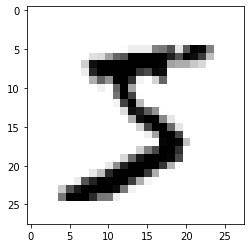

In [50]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray_r")
plt.show()

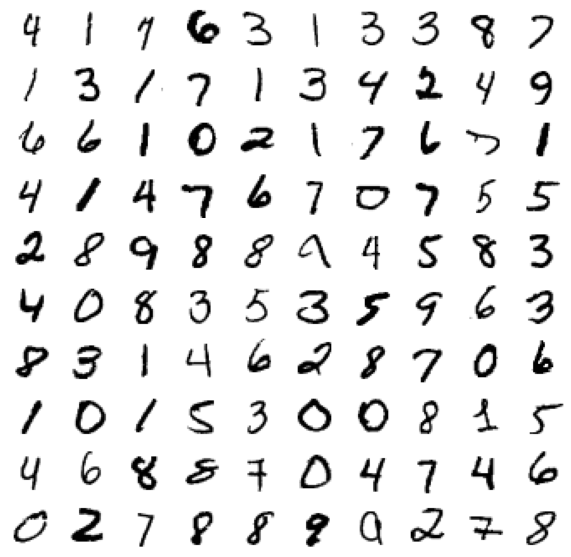

In [51]:
n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(X_train[np.random.randint(X_train.shape[0])], cmap="gray_r")
        ax[i,j].axis("off")

plt.show()

## Prep Data Set

### X_test & X_train

In [52]:
# We have to convert it to float 32 or float 64, otherwise the type will be mismatched (UFuncTypeError)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [53]:
# In order to scale (normalize) the values, all of the lists are divided into 255 which is the maximum value that an image can possibly has
X_train /= 255 
X_test /= 255

In [54]:
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

X_train shape: (60000, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


In [55]:
m, n, p = X_train.shape
print("sample size: ", m)
print("pixel count per sample: ", n * p)

sample size:  60000
pixel count per sample:  784


### y_train & y_test

In [56]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

y_train:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
y_test:
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Model

In [57]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [58]:
epochs = 50
batch_size = 64

In [59]:
model=Sequential()

model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=10)

Epoch 1/10
750/750 [==============================] - 112s 148ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 2/10
750/750 [==============================] - 132s 176ms/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0442 - val_accuracy: 0.9873
Epoch 3/10
750/750 [==============================] - 109s 145ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0414 - val_accuracy: 0.9897
Epoch 4/10
750/750 [==============================] - 100s 133ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 5/10
750/750 [==============================] - 100s 134ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0417 - val_accuracy: 0.9889
Epoch 6/10
750/750 [==============================] - 106s 142ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 7/10
750/750 [==============================] - 124s 165ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0392 -

## Evaluate

Text(0.5, 1.0, 'Loss Curves')

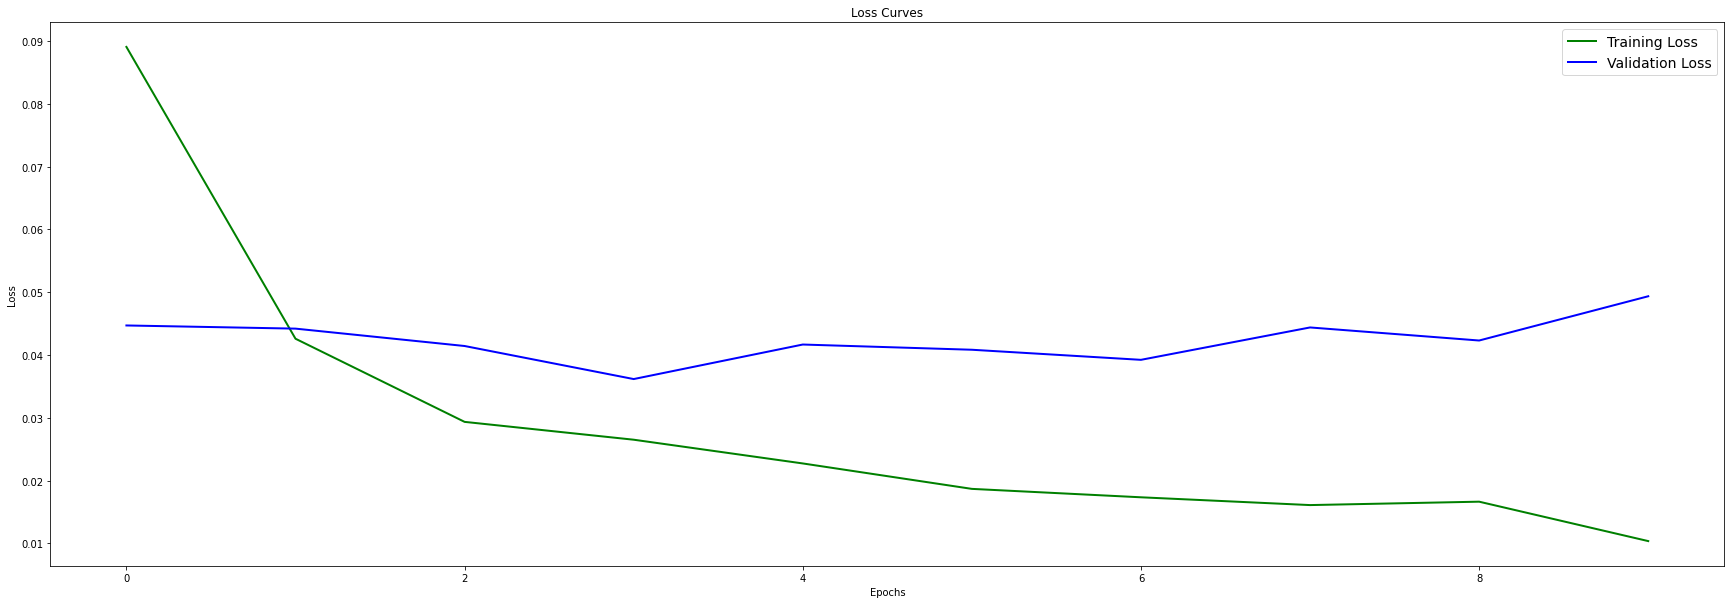

In [61]:
# Loss curve
plt.figure(figsize = [30,10])
plt.plot(history.history["loss"], "g", linewidth = 2.0)
plt.plot(history.history["val_loss"], "b", linewidth = 2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Loss", fontsize = 10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

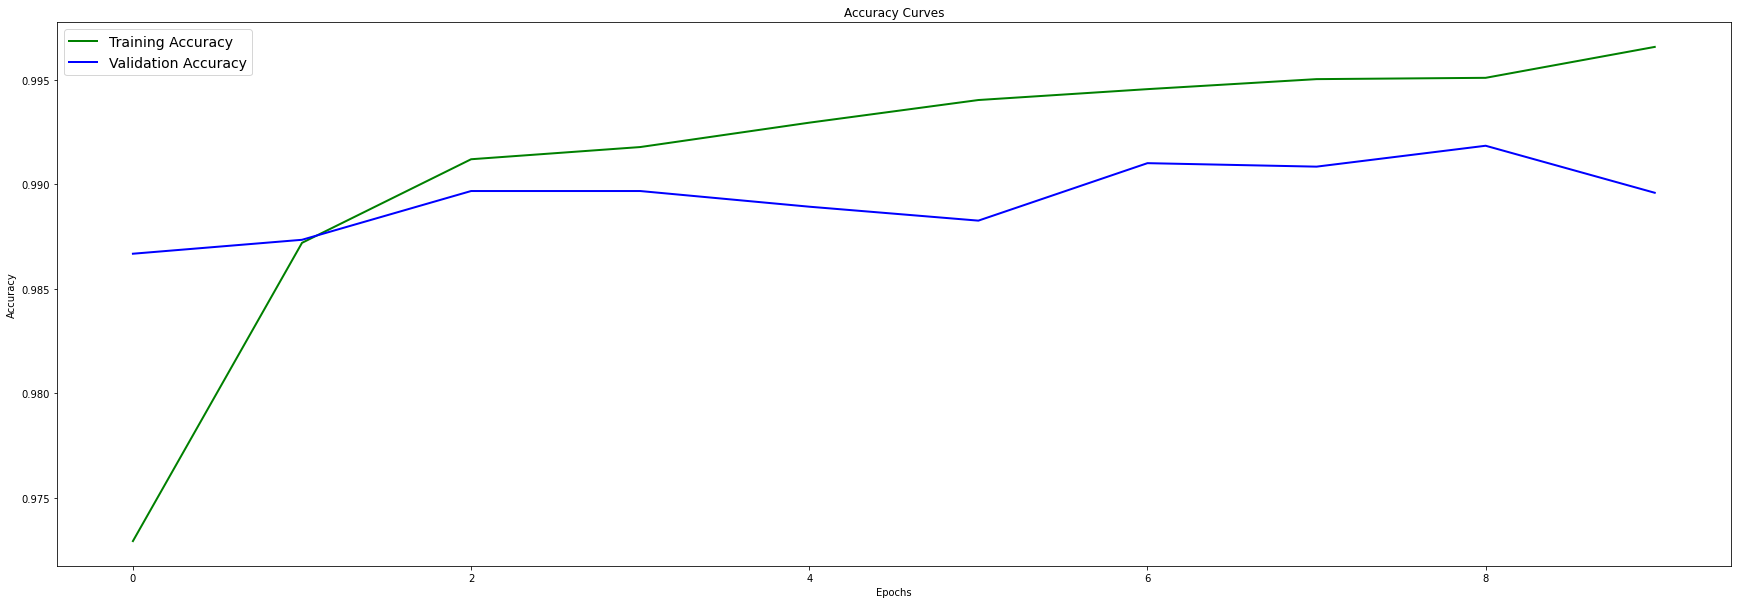

In [62]:
# Accuracy curve
plt.figure(figsize = [30,10])
plt.plot(history.history["accuracy"], "g", linewidth = 2.0)
plt.plot(history.history["val_accuracy"], "b", linewidth = 2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10)
plt.title("Accuracy Curves", fontsize = 12)

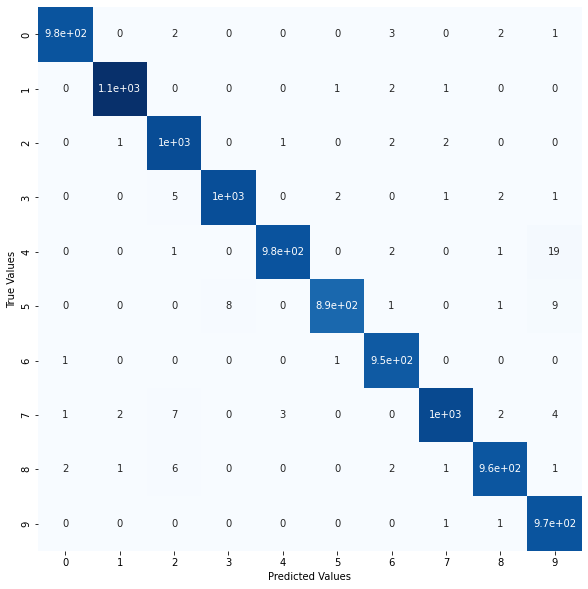

In [63]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Prediction

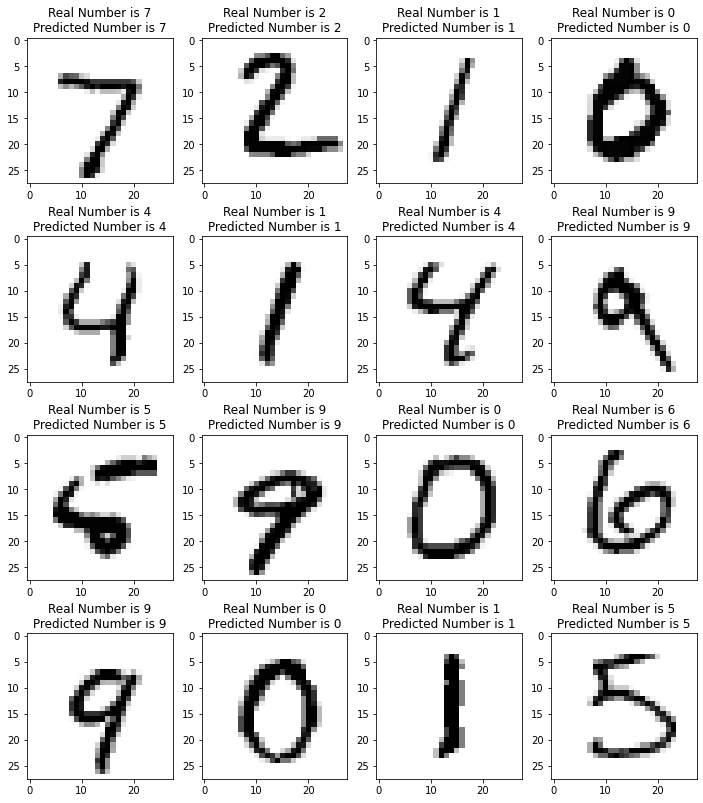

In [64]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredicted Number is {y_pred[i].argmax()}");